In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=58d2344785c89d71f3ed3a096b8a32e0


In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

633

In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

#Loop through all the cities in our list
for i,city in enumerate(cities):

    #Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create end point URL with each city. 
    city_url = url + "&q=" + city.replace(" ","+")
    # Log the URL, record, and set numbers and the city. 
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
    
    # Add 1 to the record count 
    record_count += 1 
    
# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | bac lieu
Processing Record 3 of Set 1 | qui nhon
Processing Record 4 of Set 1 | marzuq
Processing Record 5 of Set 1 | alofi
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | anadyr
Processing Record 9 of Set 1 | castro
Processing Record 10 of Set 1 | arua
Processing Record 11 of Set 1 | kirakira
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | jamestown
Processing Record 16 of Set 1 | biaora
Processing Record 17 of Set 1 | cidreira
Processing Record 18 of Set 1 | kovur
Processing Record 19 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 20 of Set 1 | mafeteng
Processing Record 21 of Set 1 | saldanha
Processing Record 22 of Set 1 | clyde riv

Processing Record 36 of Set 4 | bulgan
Processing Record 37 of Set 4 | gbadolite
Processing Record 38 of Set 4 | qaanaaq
Processing Record 39 of Set 4 | tunghsiao
City not found. Skipping...
Processing Record 40 of Set 4 | hithadhoo
Processing Record 41 of Set 4 | saint-philippe
Processing Record 42 of Set 4 | port hedland
Processing Record 43 of Set 4 | richards bay
Processing Record 44 of Set 4 | muyezerskiy
Processing Record 45 of Set 4 | sarangani
Processing Record 46 of Set 4 | namatanai
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | fiche
Processing Record 49 of Set 4 | tefe
Processing Record 50 of Set 4 | klaksvik
Processing Record 1 of Set 5 | alta floresta
Processing Record 2 of Set 5 | victoria
Processing Record 3 of Set 5 | husavik
Processing Record 4 of Set 5 | along
Processing Record 5 of Set 5 | nha trang
Processing Record 6 of Set 5 | uthal
Processing Record 7 of Set 5 | prince rupert
Processing Record 8 of Set 5 | zhigalovo
Processing Record 

Processing Record 15 of Set 12 | vardo
Processing Record 16 of Set 12 | killybegs
Processing Record 17 of Set 12 | mahon
Processing Record 18 of Set 12 | kungurtug
Processing Record 19 of Set 12 | bad salzungen
Processing Record 20 of Set 12 | alcains
Processing Record 21 of Set 12 | csakvar
Processing Record 22 of Set 12 | balkanabat
Processing Record 23 of Set 12 | hasaki
Processing Record 24 of Set 12 | bedele
Processing Record 25 of Set 12 | mavelikara
Processing Record 26 of Set 12 | gulbene
Processing Record 27 of Set 12 | carolina
Processing Record 28 of Set 12 | inhambane
Processing Record 29 of Set 12 | tyrma
Processing Record 30 of Set 12 | nizhneyansk
City not found. Skipping...
Processing Record 31 of Set 12 | bathsheba
Processing Record 32 of Set 12 | praia
Processing Record 33 of Set 12 | trebinje
Processing Record 34 of Set 12 | dhidhdhoo
Processing Record 35 of Set 12 | joensuu
Processing Record 36 of Set 12 | yar-sale
Processing Record 37 of Set 12 | lisakovsk
Processi

In [9]:
len(city_data)

581

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cape Town,-33.9258,18.4232,63.12,61,0,1.01,ZA,2021-08-25 15:46:56
1,Bac Lieu,9.2850,105.7244,77.09,86,100,5.12,VN,2021-08-25 15:47:18
2,Qui Nhon,13.7667,109.2333,79.68,88,100,8.86,VN,2021-08-25 15:47:19
3,Marzuq,14.4000,46.4667,84.09,50,45,7.87,YE,2021-08-25 15:47:19
4,Alofi,-19.0595,-169.9187,69.69,73,100,13.80,NU,2021-08-25 15:47:20
5,Hobart,-42.8794,147.3294,44.46,89,90,4.00,AU,2021-08-25 15:47:20
6,Rikitea,-23.1203,-134.9692,70.54,65,2,8.70,PF,2021-08-25 15:47:20
7,Anadyr,64.7500,177.4833,45.10,87,75,13.42,RU,2021-08-25 15:47:21
8,Castro,-24.7911,-50.0119,83.05,30,2,13.18,BR,2021-08-25 15:47:21
9,Arua,3.0201,30.9111,66.40,84,68,6.02,UG,2021-08-25 15:47:22


In [11]:
new_city_order =["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_city_order]

In [12]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cape Town,ZA,2021-08-25 15:46:56,-33.9258,18.4232,63.12,61,0,1.01
1,Bac Lieu,VN,2021-08-25 15:47:18,9.2850,105.7244,77.09,86,100,5.12
2,Qui Nhon,VN,2021-08-25 15:47:19,13.7667,109.2333,79.68,88,100,8.86
3,Marzuq,YE,2021-08-25 15:47:19,14.4000,46.4667,84.09,50,45,7.87
4,Alofi,NU,2021-08-25 15:47:20,-19.0595,-169.9187,69.69,73,100,13.80


In [13]:
# Create the output file (CSV).
output_data_file = "data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

### Loading datafile 

In [14]:
# Load output file
city_data_to_load = "data/cities.csv"
city_data_df = pd.read_csv(city_data_to_load)
# city_data_df = city_data_df.set_index(['City_ID'])
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Cape Town,ZA,2021-08-25 15:46:56,-33.9258,18.4232,63.12,61,0,1.01
1,1,Bac Lieu,VN,2021-08-25 15:47:18,9.2850,105.7244,77.09,86,100,5.12
2,2,Qui Nhon,VN,2021-08-25 15:47:19,13.7667,109.2333,79.68,88,100,8.86
3,3,Marzuq,YE,2021-08-25 15:47:19,14.4000,46.4667,84.09,50,45,7.87
4,4,Alofi,NU,2021-08-25 15:47:20,-19.0595,-169.9187,69.69,73,100,13.80


In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [16]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")
today

'08/25/21'

### Scatter Plots of City Latitude vs Weather parameters

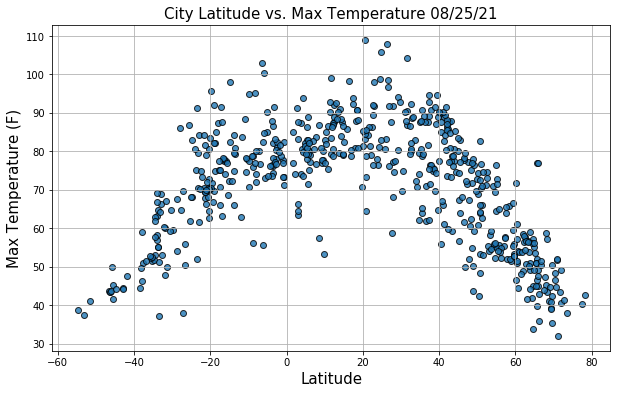

In [17]:
# Build the scatter plot for latitude vs. max temperature
plt.subplots(figsize = (10,6))
plt.scatter(lats,
            max_temps,
            edgecolor='black', linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other properties. 
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"), fontsize=15)
plt.ylabel("Max Temperature (F)", fontsize=15)
plt.yticks(np.arange(30,111, step=10.0))
plt.xlabel("Latitude", fontsize = 15)
plt.grid(True)

# Sae the fugure
plt.savefig("../images/CityLatitudenTemp.png")

#Show plot
plt.show()

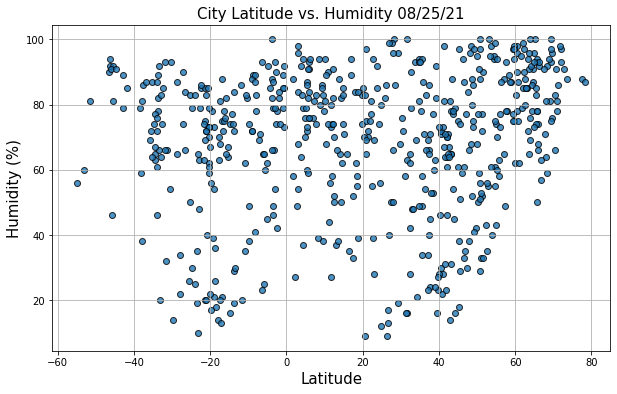

In [20]:
# Build the scatter plot for latitude vs. humidity
plt.subplots(figsize = (10,6))
plt.scatter(lats,
            humidity,
            edgecolor='black', linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other properties. 
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"), fontsize=15)
plt.ylabel("Humidity (%)", fontsize=15)
plt.xlabel("Latitude", fontsize = 15)
plt.grid(True)

# Sae the fugure
plt.savefig("../image/CityLatitudenHumidity.png")

#Show plot
plt.show()

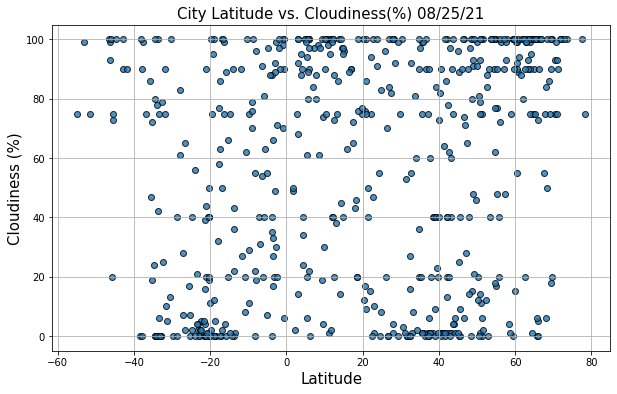

In [21]:
# Build the scatter plot for latitude vs. cloudiness
plt.subplots(figsize = (10,6))
plt.scatter(lats,
            cloudiness,
            edgecolor='black', linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other properties. 
plt.title(f"City Latitude vs. Cloudiness(%) " + time.strftime("%x"), fontsize=15)
plt.ylabel("Cloudiness (%)", fontsize=15)
plt.xlabel("Latitude", fontsize = 15)
plt.grid(True)

# Sae the fugure
plt.savefig("../image/CityLatitudenCloud.png")

#Show plot
plt.show()

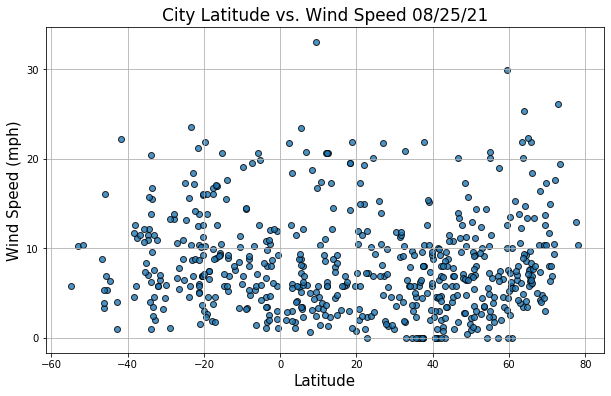

In [22]:
# Build the scatter plot for latitude vs.Wind Speed
plt.subplots(figsize = (10,6))
plt.scatter(lats,
            wind_speed,
            edgecolor='black', linewidth=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other properties. 
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"), fontsize = 17)
plt.ylabel("Wind Speed (mph)" , fontsize=15)
plt.xlabel("Latitude" , fontsize=15)
plt.yticks(np.arange(0,40,step=10.0))
plt.grid(True)

# Save the fugure
plt.savefig("../image/CityLatitudenWindSpeed.png")

#Show plot
plt.show()

### Linear Regression plots of Northern/Southern Hemishere

In [24]:
 from scipy.stats import linregress

In [25]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.subplots(figsize = (10,6))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [26]:
# Create Northern and Southern Hemisphere DataFrames
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0 )]

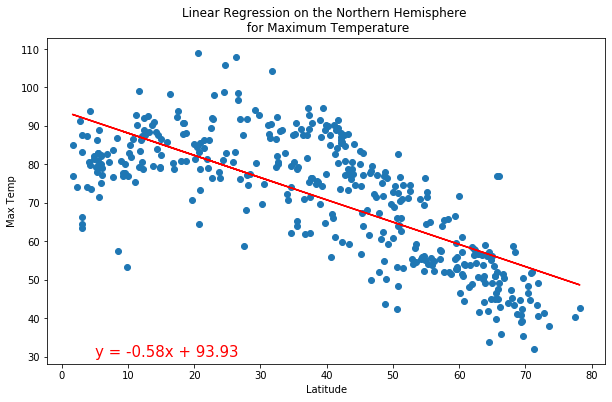

<Figure size 432x288 with 0 Axes>

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(5,30))
# Save the fugure
plt.savefig("../image/RegressionTempNorth.png")

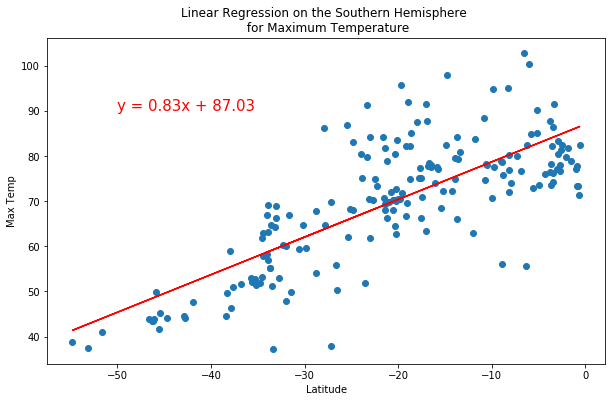

<Figure size 432x288 with 0 Axes>

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 
                       'Max Temp',(-50,90))
# Save the fugure
plt.savefig("../image/RegressionTempSouth.png")

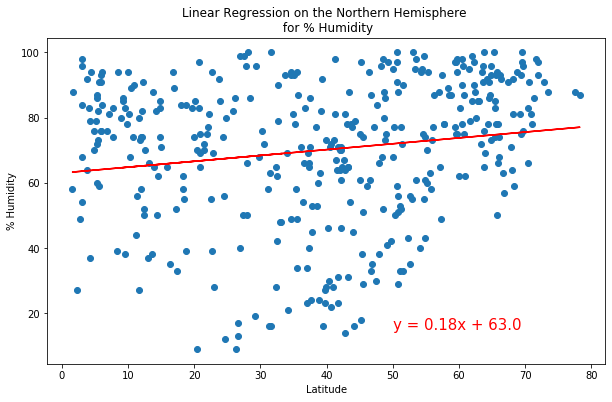

<Figure size 432x288 with 0 Axes>

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 
                       '% Humidity',(50,15))
# Save the fugure
plt.savefig("../image/RegressionHumNorth.png")

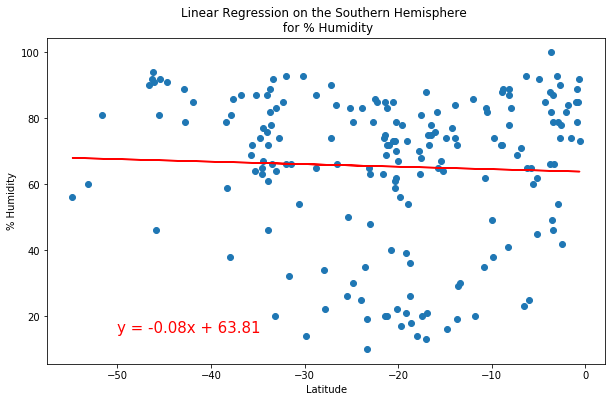

<Figure size 432x288 with 0 Axes>

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 
                       '% Humidity',(-50,15))
# Save the fugure
plt.savefig("../image/RegressionHumSouth.png")

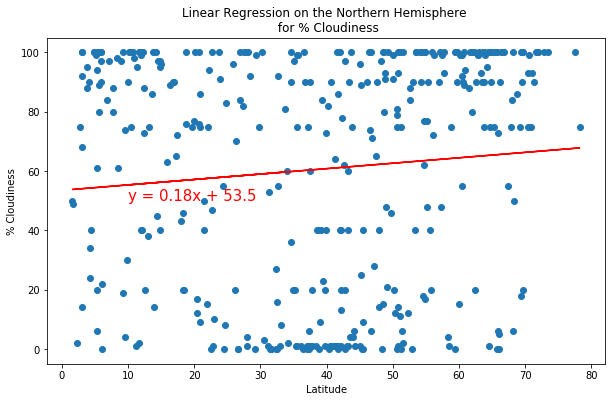

<Figure size 432x288 with 0 Axes>

In [33]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(10,50))
# Save the fugure
plt.savefig("../image/RegressionCloudNorth.png")

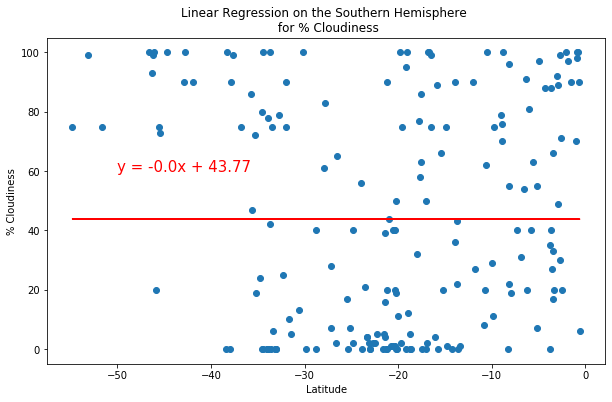

<Figure size 432x288 with 0 Axes>

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 
                       '% Cloudiness',(-50,60))
# Save the fugure
plt.savefig("../image/RegressionCloudSouth.png")

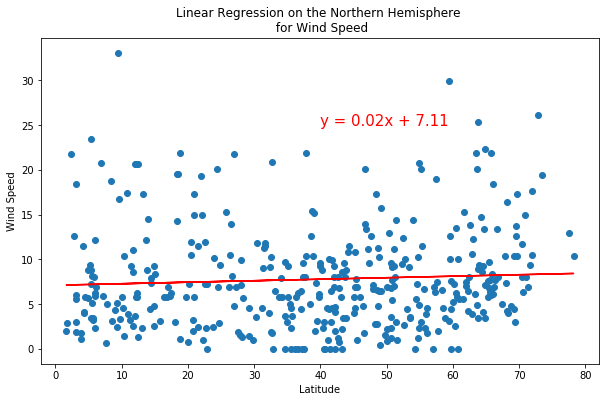

<Figure size 432x288 with 0 Axes>

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(40,25))
# Save the fugure
plt.savefig("../image/RegressionWindNorth.png")

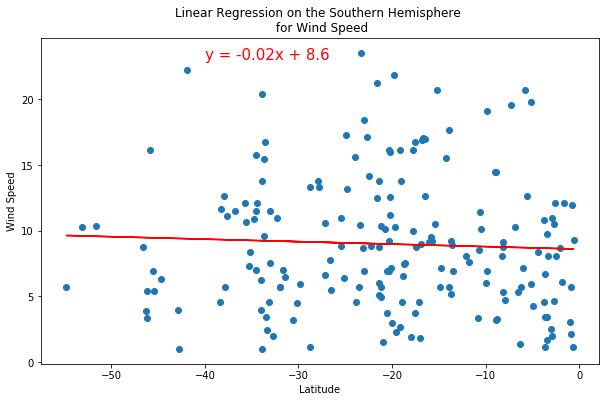

<Figure size 432x288 with 0 Axes>

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 
                       'Wind Speed',(-40,23))
# Save the fugure
plt.savefig("../image/RegressionWindSouth.png")